In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from mlp import model




train_label = pd.read_csv('/Users/hongseoklee/VSCodeWorkspace/AIs/NCSoft/final_data/train/train_label.csv')
print(train_label)


train_activity = pd.read_csv('/Users/hongseoklee/VSCodeWorkspace/AIs/NCSoft/final_data/train/train_activity.csv')
print(train_activity)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9985 (39.00 KB)
Trainable params: 9985 (39.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
                                                  acc_id     label
0      b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...      week
1      ed500c4957956b3e99dc3985666850b582f812405eefb6...      week
2      acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...      week
3      34095a3c9a2

In [2]:
df = pd.merge(left = train_label , right = train_activity, how = "inner", on = "acc_id")



# 원하는 라벨 순서 정의
label_mapping = {'week':0, 'month':1, '2month':2, 'retained':3}

# 데이터프레임 열에 매핑 적용
df['label'] = df['label'].map(label_mapping)


categorical_features = ["acc_id"]
# for문을 사용하여 Label Encoding 적용
label_encoder = LabelEncoder()
for column in categorical_features:
    df[column] = label_encoder.fit_transform(df[column])


# 결과 출력



train_x = df.drop(labels = ["label", "acc_id"], axis = 1)
train_y = df["label"]


columns = train_x.columns

print(train_x)

print(train_x.shape)

selected_features = ['item_hongmun', 'party_chat', 'cnt_dt', 'npc_hongmun', 'whisper_chat', 'wk', 'cnt_use_buffitem', 'get_money', 'quest_hongmun', 'guild_chat', 'game_combat_time', 'play_time']
train_x = train_x[selected_features]


#검증 데이터셋 추출
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)


model.fit(train_x, train_y, epochs=5, batch_size=32, validation_split=0.2)

# 훈련된 모델을 사용하여 검증 세트 예측
y_pred = model.predict(val_x)

y_pred = list(map(int, y_pred))
y_pred = [min(x, 3) for x in y_pred]
y_pred = [max(x, 0) for x in y_pred]

        wk  cnt_dt  play_time   npc_exp  npc_hongmun  quest_exp  \
0        8       3   1.519815  2.910685    -0.268110   2.852241   
1        5       7   4.698532  9.147854    -0.138458   8.584935   
2        6       3   0.632257  0.213292    -0.290501  -0.022940   
3        7       6   1.218180  1.787315    -0.159228   1.727487   
4        8       7   0.521166 -0.231874    -0.030257  -0.250423   
...     ..     ...        ...       ...          ...        ...   
440318   4       3  -0.486890 -0.231874    -0.251545  -0.250423   
440319   5       4  -0.035085 -0.231874    -0.004726  -0.250423   
440320   6       5   0.445482 -0.231874    -0.054757  -0.250423   
440321   7       7   0.832217 -0.231874     0.484635  -0.250423   
440322   8       7   1.132428 -0.231874     0.461161  -0.250423   

        quest_hongmun  item_hongmun  game_combat_time  get_money  ...  \
0            2.332910     -0.306354          0.727017  -0.023484  ...   
1            5.995250     -0.306354          2.98

In [3]:
# 분류 보고서 출력
print('Classification Report:')
print(classification_report(val_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.67      0.64     15358
           1       0.33      0.48      0.39     19432
           2       0.24      0.50      0.33     19815
           3       0.92      0.04      0.07     33460

    accuracy                           0.35     88065
   macro avg       0.52      0.42      0.36     88065
weighted avg       0.58      0.35      0.30     88065



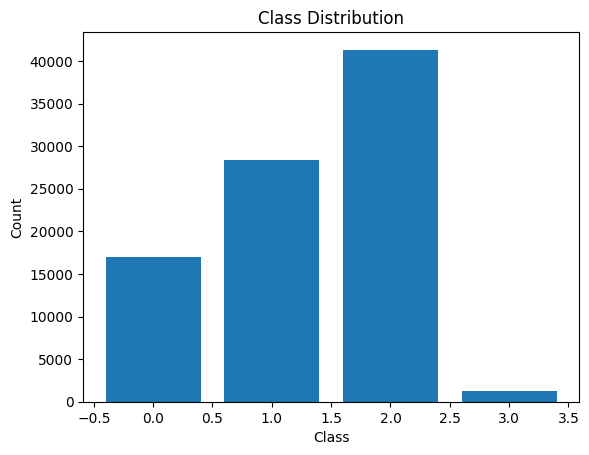

In [4]:
# 클래스 레이블과 개수 추출
labels = list(set(y_pred))  # 중복을 제거한 클래스 레이블 리스트
counts = [y_pred.count(label) for label in labels]  # 각 클래스별 개수 계산

# 막대 그래프 생성
plt.bar(labels, counts)

# 그래프에 레이블 추가
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# 그래프 표시
plt.show()